This is the code to classify(binary) images as cat or dogs using logistic neural classifier.

Importing some required packages.

In [5]:
import torch
import h5py
import cv2
from matplotlib import pyplot as plt

import pathlib
import os

Reading images and converting to RGB channels, also resizing to 64x64 size.

In [6]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Will use {}'.format(device))

Will use cuda


In [7]:
X_train_cats = [cv2.imread('Data/training_set/cats/small/'+img) for img in os.listdir('Data/training_set/cats/small')]
X_train_cats = [cv2.cvtColor(img,cv2.COLOR_BGR2RGB) for img in X_train_cats]
X_train_cats = [cv2.resize(img,(64,64)) for img in X_train_cats]
X_train_cats = torch.Tensor(X_train_cats)
X_train_cats = X_train_cats/255
Y_train_cats = torch.zeros((1,X_train_cats.shape[0]))
print('Training data shape for cats:- X:{0} Y:{1}'.format(X_train_cats.shape,Y_train_cats.shape))

Training data shape for cats:- X:torch.Size([209, 64, 64, 3]) Y:torch.Size([1, 209])


In [8]:
X_train_dogs = [cv2.imread('Data/training_set/dogs/small/'+img) for img in os.listdir('Data/training_set/dogs/small')]
X_train_dogs = [cv2.cvtColor(img,cv2.COLOR_BGR2RGB) for img in X_train_dogs]
X_train_dogs = [cv2.resize(img,(64,64)) for img in X_train_dogs]
X_train_dogs = torch.Tensor(X_train_dogs)
X_train_dogs = X_train_dogs/255
Y_train_dogs = torch.ones((1,X_train_dogs.shape[0]))
print('Training data shape for dogs:- X:{0} Y:{1}'.format(X_train_dogs.shape,Y_train_dogs.shape))

Training data shape for dogs:- X:torch.Size([209, 64, 64, 3]) Y:torch.Size([1, 209])


In [9]:
X_train = torch.cat((X_train_cats,X_train_dogs))
m,h,w,c = list(X_train.shape)
n=h*w*c
X_train = torch.reshape(X_train,(m,n)).T

Y_train = torch.cat((Y_train_cats.int(),Y_train_dogs.int()),dim=1)
Y_train = torch.reshape(Y_train,(m,1)).T

print('Training data shape:- X:{0} Y:{1}'.format(X_train.shape,Y_train.shape))

Training data shape:- X:torch.Size([12288, 418]) Y:torch.Size([1, 418])


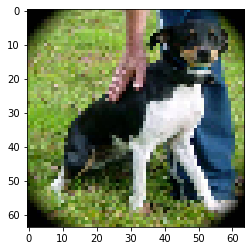

In [10]:
img  = torch.reshape(X_train[:,379],(h,w,c))
plt.imshow(img.numpy())

In [11]:
X_train = X_train.to(device)
Y_train = Y_train.to(device)

Here i the model which will be used.

In [12]:
learning_rate = 0.0075

In [13]:
class Model:
    def __init__(self,shape,learning_rate):
        self.w1 = torch.rand((7,shape),requires_grad=True)
        self.b1 = torch.zeros((7,1),requires_grad=True)
        self.w2 = torch.rand((1,7),requires_grad=True)
        self.b2 = torch.zeros((1,1),requires_grad=True)
        self.learning_rate = learning_rate
    
    def forward_pass(self,X):
        self.Z1 = torch.matmul(self.w1,X) + self.b1 #3xm
        self.A1 = self.sigmoidActivation(self.Z1)
        
        self.Z2 = torch.mm(self.w2,self.A1) + self.b2 #1xm
        self.A2 = self.sigmoidActivation(self.Z2)
        return self.A2
    
    def compute_cost(self,Y):
        return -( torch.matmul(Y,torch.log(self.A2).T) + torch.matmul(1-Y,torch.log(1-self.A2).T))/Y.shape[0]
    
    def back_pass(self):      
        with torch.no_grad():
            self.w2 = self.w2 - self.learning_rate*self.w2.grad
            self.b2 = self.b2 - self.learning_rate*self.b2.grad
            self.w1 = self.w1 - self.learning_rate*self.w1.grad
            self.b1 = self.b1 - self.learning_rate*self.b1.grad
            
        self.w1.requires_grad=True
        self.b1.requires_grad=True
        self.w2.requires_grad=True
        self.b2.requires_grad=True
            
        #self.w1.grad.zero_()
        #self.b1.grad.zero_()
        #self.w2.grad.zero_()
        #self.b2.grad.zero_()
        
    def predict(self, X):
        return self.forward_pass(X)
    
    def sigmoidActivation(self,Z):
        return 1/(1+torch.exp(-Z))
    
    def reluActivation(self,Z):
        return torch.maximum(torch.Tensor([0]),Z)

In [15]:
finder = Model(n,learning_rate,device)
costs=[]

TypeError: __init__() takes 3 positional arguments but 4 were given

In [ ]:
for i in range(400):
    Y_hat = finder.forward_pass(X_train)
    cost = finder.compute_cost(Y_train)
    costs.append(cost)
    cost.backward()
    finder.back_pass()
torch.cuda.empty_cache()
plt.plot(costs)

In [ ]:
finder.predict(X_train)

In [16]:
class Model2:
    def __init__(self.features,learning_rate,device):
        self.w1 = torch.rand((20,features),requires_grad=True,device=device)
        self.b1 = torch.zeros((20,1),requires_grad=True,device=device)
        self.w2 = torch.rand((7,20),requires_grad=True,device=device)
        self.b2 = torch.zeros((7,1),requires_grad=True,device=device)
        self.w3 = torch.rand((5,7),requires_grad=True,device=device)
        self.b3 = torch.zeros((5,1),requires_grad=True,device=device)
        self.w4 = torch.rand((1,5),requires_grad=True,device=device)
        self.b4 = torch.zeros((1,1),requires_grad=True,device=device)
        self.learning_rate = learning_rate
    
    def forward_pass(self,X):
        self.Z1 = torch.matmul(self.w1,X.float()) + self.b1
        self.A1 = self.sigmoidActivation(self.Z1)
        
        self.Z2 = torch.matmul(self.w2,self.A1) + self.b2
        self.A2 = self.sigmoidActivation(self.Z2)
        
        self.Z3 = torch.matmul(self.w3,self.A2) + self.b3
        self.A3 = self.sigmoidActivation(self.Z3)
        
        self.Z4 = torch.matmul(self.w4,self.A3) + self.b4
        self.A4 = self.sigmoidActivation(self.Z4)
        return self.A4
    
    def compute_cost(self,Y):
        return -1/Y.shape[1]*( torch.matmul(Y.float(),torch.log(self.A4).T) + torch.matmul(1-Y.float(),torch.log(1-self.A4).T))
    
    def back_pass(self):      
        with torch.no_grad():
            self.w4 = self.w4 - self.learning_rate*self.w4.grad
            self.b4 = self.b4 - self.learning_rate*self.b4.grad
            self.w3 = self.w3 - self.learning_rate*self.w3.grad
            self.b3 = self.b3 - self.learning_rate*self.b3.grad
            self.w2 = self.w2 - self.learning_rate*self.w2.grad
            self.b2 = self.b2 - self.learning_rate*self.b2.grad
            self.w1 = self.w1 - self.learning_rate*self.w1.grad
            self.b1 = self.b1 - self.learning_rate*self.b1.grad
            
            self.w1.grad.data.zero_()
            
        
        self.w1.requires_grad=True
        self.b1.requires_grad=True
        self.w2.requires_grad=True
        self.b2.requires_grad=True
        self.w3.requires_grad=True
        self.b3.requires_grad=True
        self.w4.requires_grad=True
        self.b4.requires_grad=True
        
        #self.w1.grad.data.zero_()
        #self.b1.grad.zero_()
        #self.w2.grad.zero_()
        #self.b2.grad.zero_()
        
    def predict(self, X):
        return self.forward_pass(X)>0.5
    
    def sigmoidActivation(self,Z):
        return 1/(1+torch.exp(-Z))
    
    def leakyReLUActivation(self,Z):
        return torch.maximum(0.001*Z,Z)
    
    def getParams(self):
        return {'w1':self.w1, 'b1':self.b1,'w2':self.w2, 'b2':self.b2,
                'w3':self.w3, 'b3':self.b3,'w4':self.w4, 'b4':self.b4,
                'learning_rate':self.learning_rate
               }
    
    
    def getGrads(self):
        return {'dw1':self.w1.grad, 'db1':self.b1.grad,'dw2':self.w2.grad, 'db2':self.b2.grad,
               'dw3':self.w3.grad, 'db3':self.b3.grad,'dw4':self.w4.grad, 'db4':self.b4.grad
               }

SyntaxError: invalid syntax (<ipython-input-16-6157ca5bb2bf>, line 2)